# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

* **Sector: 14**
  - Period: 1.2615526285
  - Tdepth: 0.0600219489**2
  
* **Sector: 15**
  - Period: 
  - Tdepth: **2
 
* **Sector: 21**
  - Period: 
  - Tdepth: **2
  
* **Sector: 22**
  - Period: 
  - Tdepth: **2
  
* **Sector: 41**
  - Period: 
  - Tdepth: **2
 
* **Sector: 48**
  - Period: 
  - Tdepth: **2

In [8]:
ID = 148914726
sectors = np.array([14])

period = 1.2615526285
tdepth = 0.0600219489**2

lc = pd.read_csv("TOI_1179_14.csv", header=None)
contrastcurve_file = "Gemini_10m_g.csv"

band = 'Vis'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

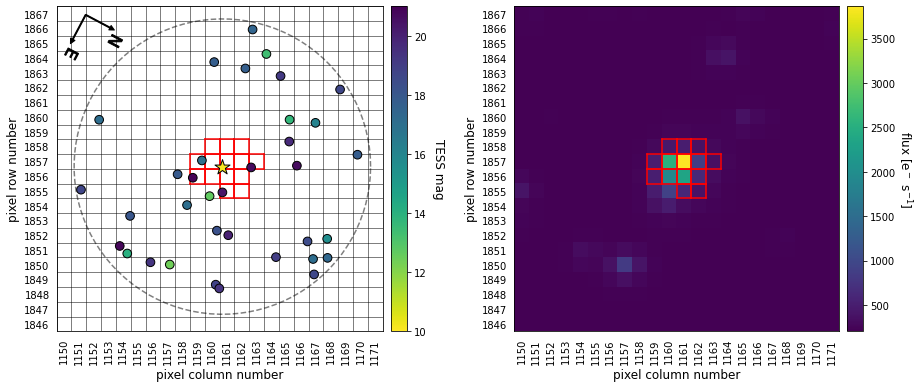

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,148914726,10.1313,9.317,8.789,8.678,187.055970,67.239983,0.810000,0.775123,4944.0,11.539200,0.000,0.000
1,148914728,16.9216,16.252,15.558,15.987,187.060081,67.231790,0.930000,0.837572,5374.0,0.315117,30.046,169.009
2,950685863,20.3670,NaN,NaN,NaN,187.079149,67.244830,NaN,NaN,NaN,2.446340,36.694,61.595
3,950685865,20.6890,NaN,NaN,NaN,187.043100,67.250035,NaN,NaN,NaN,NaN,40.380,333.660
4,950685608,20.8888,NaN,NaN,NaN,187.079980,67.231895,NaN,NaN,NaN,NaN,44.344,131.031
5,148914724,12.6933,12.181,11.873,11.807,187.088584,67.241123,1.180000,1.042790,6177.0,1.755330,45.607,84.822
6,950685609,17.9478,NaN,NaN,NaN,187.084015,67.226020,NaN,NaN,3981.0,1.068720,63.665,142.129
7,148914727,17.0561,16.326,15.489,15.561,187.107258,67.235025,0.760000,0.643362,4719.0,0.596623,73.634,104.004
8,148914723,18.2591,16.696,16.209,15.651,187.116168,67.250090,0.570000,0.678622,3758.0,0.326559,91.379,66.509
9,950685855,19.9747,NaN,NaN,NaN,187.114894,67.254854,NaN,NaN,NaN,1.209620,97.963,56.847


In [5]:
ap = np.array([[1161,1855],[1162,1855],[1159,1856],[1160,1856],[1161,1856],[1162,1856],
               [1159,1857],[1160,1857],[1161,1857],[1162,1857],[1163,1857],[1160,1858],
               [1161,1858],[1162,1858]])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [6]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,148914726,10.1313,9.317,8.789,8.678,187.055970,67.239983,0.810000,0.775123,4944.0,11.539200,0.000,0.000,9.784499e-01,0.003682
1,148914728,16.9216,16.252,15.558,15.987,187.060081,67.231790,0.930000,0.837572,5374.0,0.315117,30.046,169.009,1.382852e-03,0.000000
2,950685863,20.3670,NaN,NaN,NaN,187.079149,67.244830,NaN,NaN,NaN,2.446340,36.694,61.595,4.144235e-05,0.000000
3,950685865,20.6890,NaN,NaN,NaN,187.043100,67.250035,NaN,NaN,NaN,NaN,40.380,333.660,3.837502e-05,0.000000
4,950685608,20.8888,NaN,NaN,NaN,187.079980,67.231895,NaN,NaN,NaN,NaN,44.344,131.031,2.118083e-05,0.000000
5,148914724,12.6933,12.181,11.873,11.807,187.088584,67.241123,1.180000,1.042790,6177.0,1.755330,45.607,84.822,1.996787e-02,0.180422
6,950685609,17.9478,NaN,NaN,NaN,187.084015,67.226020,NaN,NaN,3981.0,1.068720,63.665,142.129,7.815977e-05,0.000000
7,148914727,17.0561,16.326,15.489,15.561,187.107258,67.235025,0.760000,0.643362,4719.0,0.596623,73.634,104.004,1.887775e-05,0.000000
8,148914723,18.2591,16.696,16.209,15.651,187.116168,67.250090,0.570000,0.678622,3758.0,0.326559,91.379,66.509,4.158724e-07,0.000000
9,950685855,19.9747,NaN,NaN,NaN,187.114894,67.254854,NaN,NaN,NaN,1.209620,97.963,56.847,3.951590e-08,0.000000


# Ploting CC File

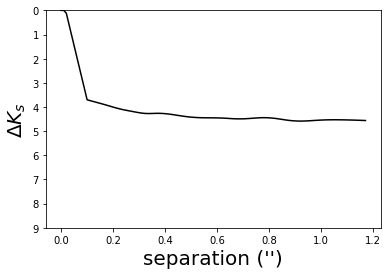

In [9]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

In [10]:
%%time

for i in range(1):
    
    lc = pd.read_csv("TOI_1179_14.csv", header=None)
    contrastcurve_file = "Gemini_10m_g.csv"
    band = 'Vis'
    
    # read in the light curve
    time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
    P_orb = period

    lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)
    target.calc_probs(time = lc.time.value, 
                      flux_0 = lc.flux.value, 
                      flux_err_0 = np.mean(lc.flux_err.value), 
                      P_orb = P_orb,
                      contrast_curve_file = contrastcurve_file,
                      filt = band,
                      exptime = 0.0013888888888889)
    
    df_results = target.probs
    print("FPP = ", target.FPP)
    print("NFPP = ", target.NFPP)
    print("")

Calculating TP scenario probabilitiey for 148914726.
Calculating EB and EBx2P scenario probabilities for 148914726.
Calculating PTP scenario probability for 148914726.
Calculating PEB and PEBx2P scenario probabilities for 148914726.
Calculating STP scenario probability for 148914726.
Calculating SEB and SEBx2P scenario probabilities for 148914726.
Calculating DTP scenario probability for 148914726.
Calculating DEB and DEBx2P scenario probabilities for 148914726.
Calculating BTP scenario probability for 148914726.
Calculating BEB and BEBx2P scenario probabilities for 148914726.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 148914724.
FPP =  0.9952134345104747
NFPP =  0.016480140481011523

Wall time: 2h 17s


In [11]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.9952134345104747
NFPP =  0.016480140481011523


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,148914726,TP,0.810000,0.775123,1.261553,82.252748,0.648943,0.216589,128.356133,4.877888,0.000000,0.000000,7.624544e-04
1,148914726,EB,0.810000,0.775123,1.261553,82.429836,0.780493,0.382972,197.011504,0.000000,0.109942,0.133830,1.994111e-33
2,148914726,EBx2P,0.810000,0.775123,2.523105,82.052309,1.599571,0.179182,184.988314,0.000000,0.788901,0.775123,6.230848e-13
3,148914726,PTP,0.810000,0.775123,1.261553,82.631950,0.727238,0.185042,178.051404,5.067042,0.000000,0.000000,3.987173e-03
4,148914726,PEB,0.810000,0.775123,1.261553,82.507845,0.736807,0.342401,185.707602,0.000000,0.118199,0.144646,1.768821e-26
5,148914726,PEBx2P,0.810000,0.775123,2.523105,82.115567,1.544658,0.181893,175.660035,0.000000,0.805260,0.775123,2.647705e-13
6,148914726,STP,0.468788,0.467784,1.261553,85.409361,0.623429,0.047757,70.829956,10.671934,0.000000,0.000000,3.019731e-03
7,148914726,SEB,0.273783,0.295378,1.261553,89.376059,0.123499,0.046466,179.430585,0.000000,0.045655,0.100000,9.756831e-01
8,148914726,SEBx2P,0.353943,0.363292,2.523105,85.509088,1.520169,0.066770,197.614919,0.000000,0.351050,0.360877,4.212159e-07
9,148914726,DTP,0.810000,0.775123,1.261553,81.899594,0.869287,0.056388,233.368382,4.876830,0.000000,0.000000,3.693821e-05


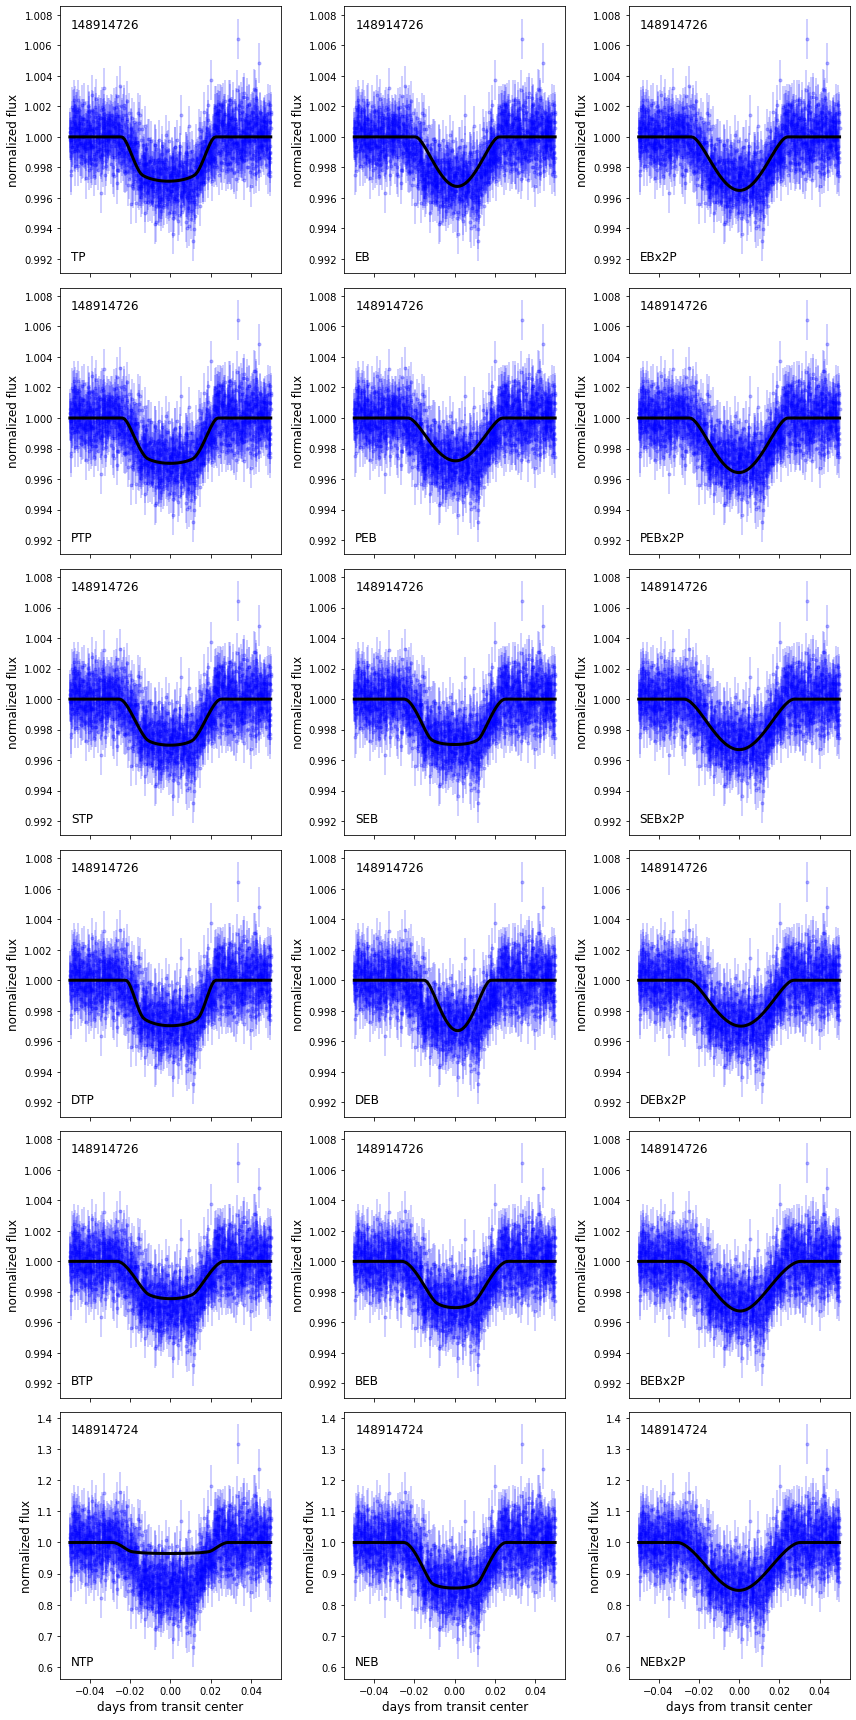

In [12]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))

# Output

## Sector 14

In [ ]:
# Sector 14
# Filter: 562 nm
FPP_14562 = []

NFPP_14562 = []

print("Sector 14")
print("Filter: 562 nm")
print("   FPP  = ",np.mean(FPP_14562),"+/-",np.std(FPP_14562))
print("   NFPP = ",np.mean(NFPP_14562),"+/-",np.std(NFPP_14562))

In [ ]:
# Sector 14
# Filter: 832 nm
FPP_14832 = []

NFPP_14832 = []

print("Sector 14")
print("Filter: 832 nm")
print("   FPP  = ",np.mean(FPP_14832),"+/-",np.std(FPP_14832))
print("   NFPP = ",np.mean(NFPP_14832),"+/-",np.std(NFPP_14832))

# Sector 15

In [ ]:
# Sector 15
# Filter: 562 nm
FPP_15562 = []

NFPP_15562 = []

print("Sector 15")
print("Filter: 562 nm")
print("   FPP  = ",np.mean(FPP_15562),"+/-",np.std(FPP_15562))
print("   NFPP = ",np.mean(NFPP_15562),"+/-",np.std(NFPP_15562))

In [ ]:
# Sector 15
# Filter: 832 nm
FPP_15832 = []

NFPP_15832 = []

print("Sector 15")
print("Filter: 832 nm")
print("   FPP  = ",np.mean(FPP_15832),"+/-",np.std(FPP_15832))
print("   NFPP = ",np.mean(NFPP_15832),"+/-",np.std(NFPP_15832))

## Sector 21

In [ ]:
# Sector 21
# Filter: 562 nm
FPP_21562 = []

NFPP_21562 = []

print("Sector 21")
print("Filter: 562 nm")
print("   FPP  = ",np.mean(FPP_21562),"+/-",np.std(FPP_21562))
print("   NFPP = ",np.mean(NFPP_21562),"+/-",np.std(NFPP_21562))

In [ ]:
# Sector 21
# Filter: 832 nm
FPP_21832 = []

NFPP_21832 = []

print("Sector 21")
print("Filter: 832 nm")
print("   FPP  = ",np.mean(FPP_21832),"+/-",np.std(FPP_21832))
print("   NFPP = ",np.mean(NFPP_21832),"+/-",np.std(NFPP_21832))

## Sector 22

In [ ]:
# Sector 22
# Filter: 562 nm
FPP_22562 = []

NFPP_22562 = []

print("Sector 22")
print("Filter: 562 nm")
print("   FPP  = ",np.mean(FPP_22562),"+/-",np.std(FPP_22562))
print("   NFPP = ",np.mean(NFPP_22562),"+/-",np.std(NFPP_22562))

In [ ]:
# Sector 22
# Filter: 832 nm
FPP_22832 = []

NFPP_22832 = []

print("Sector 22")
print("Filter: 832 nm")
print("   FPP  = ",np.mean(FPP_22832),"+/-",np.std(FPP_22832))
print("   NFPP = ",np.mean(NFPP_22832),"+/-",np.std(NFPP_22832))

## Sector 41

In [ ]:
# Sector 41
# Filter: 562 nm
FPP_41562 = []

NFPP_41562 = []

print("Sector 41")
print("Filter: 562 nm")
print("   FPP  = ",np.mean(FPP_41562),"+/-",np.std(FPP_41562))
print("   NFPP = ",np.mean(NFPP_41562),"+/-",np.std(NFPP_41562))

In [ ]:
# Sector 41
# Filter: 832 nm
FPP_41832 = []

NFPP_41832 = []

print("Sector 41")
print("Filter: 832 nm")
print("   FPP  = ",np.mean(FPP_41832),"+/-",np.std(FPP_41832))
print("   NFPP = ",np.mean(NFPP_41832),"+/-",np.std(NFPP_41832))

## Sector 48

In [ ]:
# Sector 48
# Filter: 562 nm
FPP_48562 = []

NFPP_48562 = []

print("Sector 48")
print("Filter: 562 nm")
print("   FPP  = ",np.mean(FPP_48562),"+/-",np.std(FPP_48562))
print("   NFPP = ",np.mean(NFPP_48562),"+/-",np.std(NFPP_48562))

In [ ]:
# Sector 48
# Filter: 832 nm
FPP_48832 = []

NFPP_48832 = []

print("Sector 48")
print("Filter: 832 nm")
print("   FPP  = ",np.mean(FPP_48832),"+/-",np.std(FPP_48832))
print("   NFPP = ",np.mean(NFPP_48832),"+/-",np.std(NFPP_48832))